In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve

In [2]:
data=pd.read_csv('C:\\Lachin\\DataSets\\2. ST Academy - Classification models resource files\\House-Price.csv')

In [3]:
data.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [5]:
data.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


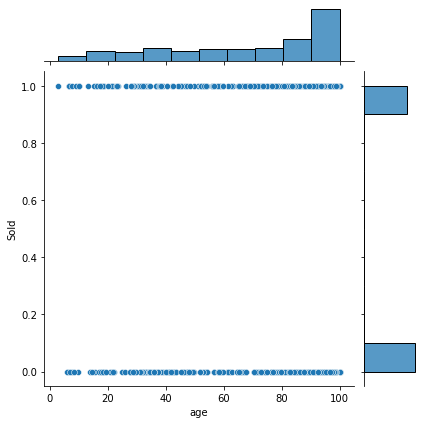

In [6]:
sns.jointplot(data=data,x='age',y='Sold')

<AxesSubplot:xlabel='age'>

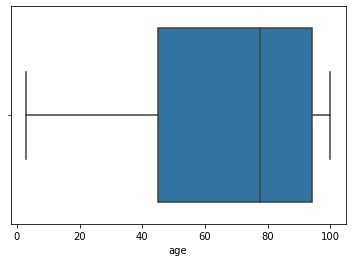

In [7]:
sns.boxplot(data=data, x='age')

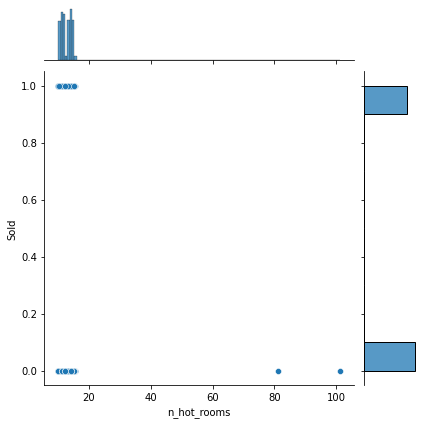

In [8]:
sns.jointplot(x=data['n_hot_rooms'],y=data['Sold'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_hot_rooms'>

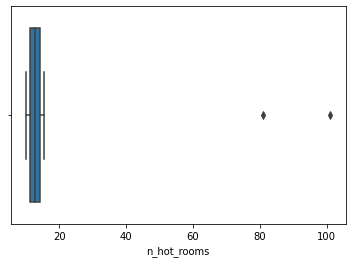

In [9]:
sns.boxplot(data['n_hot_rooms'])

<AxesSubplot:>

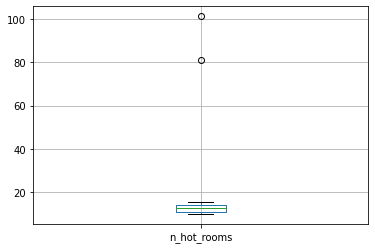

In [10]:
data.boxplot(column='n_hot_rooms')

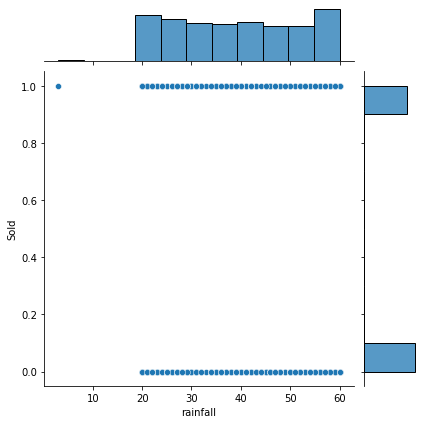

In [11]:
sns.jointplot(data=data,x='rainfall',y='Sold')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rainfall'>

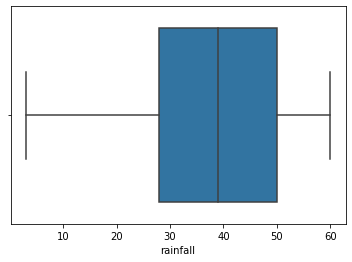

In [12]:

sns.boxplot(data['rainfall'])

In [13]:
data.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


<AxesSubplot:xlabel='airport', ylabel='count'>

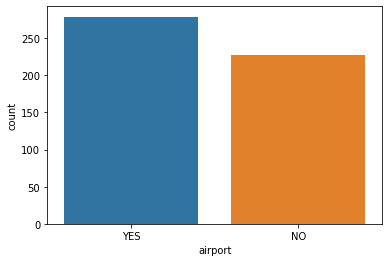

In [14]:
sns.countplot(data=data, x='airport')

<AxesSubplot:xlabel='count', ylabel='waterbody'>

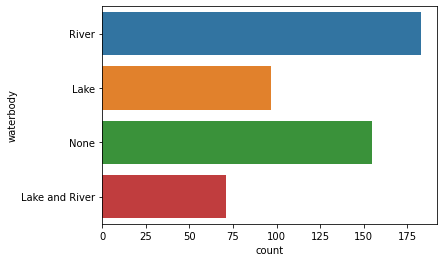

In [15]:
sns.countplot(data=data, y='waterbody')

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

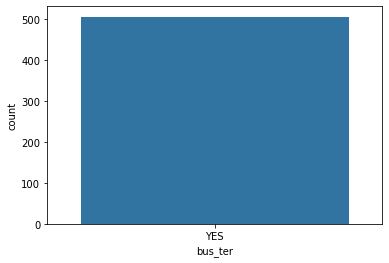

In [16]:
sns.countplot(data=data, x='bus_ter')

In [17]:
del data['bus_ter']

In [18]:
data.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,0


In [19]:
data.shape

(506, 18)

In [20]:
Q1=data['n_hot_rooms'].quantile(0.25)

In [21]:
Q1

11.189800000000002

In [22]:
Q3=data['n_hot_rooms'].quantile(0.75)

In [23]:
IQR=Q3-Q1

In [24]:
IQR

2.981

In [25]:
outdata=((data['n_hot_rooms']<(Q1-1.5*IQR))|(data['n_hot_rooms']>(Q3+1.5*IQR)))

In [26]:
outdata

0      False
1      False
2       True
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: n_hot_rooms, Length: 506, dtype: bool

In [27]:
data.shape

(506, 18)

In [28]:
df=data[~outdata]

In [29]:
df.shape

(504, 18)

In [30]:
Q11=df['rainfall'].quantile(0.25)
Q33=df['rainfall'].quantile(0.75)
IQR1=Q33-Q11
outdata1=((data['rainfall']<(Q11-1.5*IQR1))|(data['rainfall']>(Q33+1.5*IQR1)))

In [31]:
Q11

28.0

In [32]:
Q33

50.0

In [33]:
IQR1

22.0

In [34]:
Q11-1.5*IQR1

-5.0

In [35]:
outdata1

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: rainfall, Length: 506, dtype: bool

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rainfall', ylabel='count'>

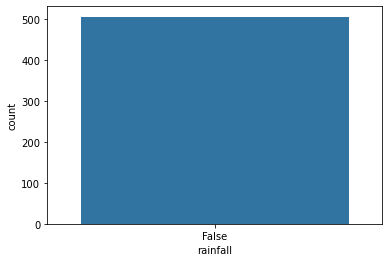

In [36]:
sns.countplot(outdata1)

In [37]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.00000,504.000000,504.000000,504.000000,504.000000,496.000000,504.000000,504.000000,504.000000,504.000000
mean,22.522817,41.131032,0.554747,6.283208,68.556944,3.973651,3.62996,3.961806,3.619762,21.546627,12.649067,7.900044,12.731770,39.204365,0.054454,0.456349
std,9.175368,6.864566,0.116015,0.702819,28.193166,2.110507,2.11048,2.122262,2.101063,2.167652,7.129147,1.479395,1.680027,12.530198,0.010639,0.498586
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.92000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.075000,35.175000,0.449000,5.884750,44.850000,2.270000,1.94000,2.230000,1.940000,19.800000,6.990000,6.632000,11.189000,28.000000,0.046473,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.01000,3.375000,3.070000,20.950000,11.360000,7.999000,12.400000,39.500000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.620500,94.100000,5.380000,5.00000,5.412500,4.995000,22.625000,16.945000,9.091500,14.169000,50.000000,0.061390,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.93000,12.320000,11.940000,27.400000,37.970000,10.876000,15.400000,60.000000,0.086711,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        504 non-null    float64
 1   resid_area   504 non-null    float64
 2   air_qual     504 non-null    float64
 3   room_num     504 non-null    float64
 4   age          504 non-null    float64
 5   dist1        504 non-null    float64
 6   dist2        504 non-null    float64
 7   dist3        504 non-null    float64
 8   dist4        504 non-null    float64
 9   teachers     504 non-null    float64
 10  poor_prop    504 non-null    float64
 11  airport      504 non-null    object 
 12  n_hos_beds   496 non-null    float64
 13  n_hot_rooms  504 non-null    float64
 14  waterbody    504 non-null    object 
 15  rainfall     504 non-null    int64  
 16  parks        504 non-null    float64
 17  Sold         504 non-null    int64  
dtypes: float64(14), int64(2), object(2)
memory usage: 

In [39]:
df.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
parks          0
Sold           0
dtype: int64

In [40]:
df['n_hos_beds'].fillna(df['n_hos_beds'].mean(),inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [41]:
df.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
parks          0
Sold           0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,1
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,0
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,0.045910,1


In [44]:
df['avg.dis']=df['dist1']+df['dist2']+df['dist3']+df['dist4']/4

<ipython-input-44-49c6a7353613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg.dis']=df['dist1']+df['dist2']+df['dist3']+df['dist4']/4


In [46]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg.dis
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,0,13.3425
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,1,16.0750
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,0,19.7900
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,0,19.8550
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,0.045910,1,19.7475


In [48]:
del df['dist1']

In [49]:
df.drop(columns=['dist2','dist3','dist4'], axis=1,inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg.dis
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,0,13.3425
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,1,16.0750
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,0,19.7900
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,0,19.8550
5,28.7,32.18,0.458,6.430,58.7,21.3,5.21,YES,7.174,14.2296,None,53,0.045910,1,19.7475


In [51]:
df1=pd.get_dummies(df, columns=['airport','waterbody'],drop_first=True)

In [52]:
df1.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg.dis,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,0,13.3425,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,1,16.0750,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,0,19.7900,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,19.8550,0,0,0,0
5,28.7,32.18,0.458,6.430,58.7,21.3,5.21,7.174,14.2296,53,0.045910,1,19.7475,1,0,1,0


In [54]:
x=df1.drop('Sold',axis=1)

In [55]:
y=df1.iloc[:,11]

In [56]:
x

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg.dis,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,13.3425,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,16.0750,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,19.7900,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,19.8550,0,0,0,0
5,28.7,32.18,0.458,6.430,58.7,21.3,5.21,7.174,14.2296,53,0.045910,19.7475,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,0.056006,8.3650,0,1,0,0
502,20.6,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,0.059903,7.5450,1,1,0,0
503,23.9,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,0.057572,7.1850,0,0,1,0
504,22.0,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,0.060694,7.8275,1,0,1,0


In [57]:
y

0      0
1      1
3      0
4      0
5      1
      ..
501    1
502    1
503    1
504    1
505    1
Name: Sold, Length: 504, dtype: int64

In [59]:
x_cons=sn.add_constant(x)

In [60]:
logit=sm.Logit(y,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.558854
         Iterations 6


In [61]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  504
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                           16
Date:                Fri, 13 Aug 2021   Pseudo R-squ.:                  0.1893
Time:                        13:11:14   Log-Likelihood:                -281.66
converged:                       True   LL-Null:                       -347.42
Covariance Type:            nonrobust   LLR p-value:                 3.250e-20
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4722      2.710     -0.912      0.362      -7.784       2.839
price                       -0.2731      0.033     -8.310      0.000      -0.338      -0.209
resid_area                   0.0203      0.027      0.762      0.446      -0.032       0.073
air_qual                    -7.3850      2.688     -2.748      0.006     -12.653      -2.117
room_num                     1.1063      0.276      4.006      0.000       0.565       1.648
age                         -0.0018      0.007     -0.272      0.786      -0.015       0.011
teachers                     0.3151      0.064      4.941      0.000       0.190       0.440
poor_prop                   -0.2070      0.034     -6.137      0.000      -0.273      -0.141
n_hos_beds                   0.1751      0.071      2.457      0.014       0.035       0.315
n_hot_rooms                 -0.0617      0.061     -1.010      0.313      -0.181       0.058
rainfall                    -0.0037      0.008     -0.442      0.658      -0.020       0.013
parks                       28.7911     24.156      1.192      0.233     -18.554      76.137
avg.dis                     -0.1215      0.030     -4.065      0.000      -0.180      -0.063
airport_YES                 -0.1540      0.211     -0.731      0.465      -0.567       0.259
waterbody_Lake and River     0.0314      0.359      0.087      0.930      -0.673       0.736
waterbody_None               0.0995      0.304      0.328      0.743      -0.496       0.695
waterbody_River              0.3399      0.294      1.157      0.247      -0.236       0.916
============================================================================================
"""

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Rregression

In [63]:
model=LogisticRegression()

In [64]:
model.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model.coef_

array([[-0.2496803 , -0.01296915, -0.12270468,  0.91106219, -0.0044966 ,
         0.22202498, -0.22197253,  0.11111156, -0.0672323 , -0.00903946,
        -0.00421261, -0.08911417, -0.11121324, -0.06591373,  0.09795429,
         0.06271803]])

In [66]:
model.intercept_

array([0.00159141])

In [67]:
y_pred=model.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.6732673267326733

Text(33.0, 0.5, 'Actual')

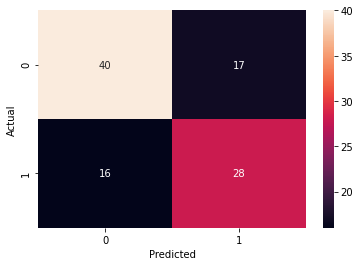

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [72]:
y_pred_proba=model.predict_proba(x_test)

In [74]:
y_pred_proba

array([[0.16803422, 0.83196578],
       [0.78127242, 0.21872758],
       [0.61480553, 0.38519447],
       [0.67594516, 0.32405484],
       [0.31691781, 0.68308219],
       [0.49932588, 0.50067412],
       [0.44621033, 0.55378967],
       [0.83777337, 0.16222663],
       [0.18208501, 0.81791499],
       [0.2270001 , 0.7729999 ],
       [0.43381521, 0.56618479],
       [0.48942024, 0.51057976],
       [0.56501917, 0.43498083],
       [0.3036192 , 0.6963808 ],
       [0.61804277, 0.38195723],
       [0.35085372, 0.64914628],
       [0.83551144, 0.16448856],
       [0.94588744, 0.05411256],
       [0.07958469, 0.92041531],
       [0.51213093, 0.48786907],
       [0.95807479, 0.04192521],
       [0.91582413, 0.08417587],
       [0.63207795, 0.36792205],
       [0.58512653, 0.41487347],
       [0.59550693, 0.40449307],
       [0.34578796, 0.65421204],
       [0.74704898, 0.25295102],
       [0.47673172, 0.52326828],
       [0.70266542, 0.29733458],
       [0.32148666, 0.67851334],
       [0.

In [75]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [76]:
accuracy_score(y_train,model.predict(x_train))

0.6823821339950372

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        57
           1       0.62      0.64      0.63        44

    accuracy                           0.67       101
   macro avg       0.67      0.67      0.67       101
weighted avg       0.67      0.67      0.67       101



# Linear Discriminant Analysis

In [78]:
modell=LinearDiscriminantAnalysis()

In [79]:
modell.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [80]:
y_predl=model.predict(x_test)

In [81]:
accuracy_score(y_test,y_predl)

0.6732673267326733

In [85]:
accuracy_score(y_train,modell.predict(x_train))

0.6873449131513648

In [83]:
print(classification_report(y_test,y_predl))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        57
           1       0.62      0.64      0.63        44

    accuracy                           0.67       101
   macro avg       0.67      0.67      0.67       101
weighted avg       0.67      0.67      0.67       101



Text(33.0, 0.5, 'Actual')

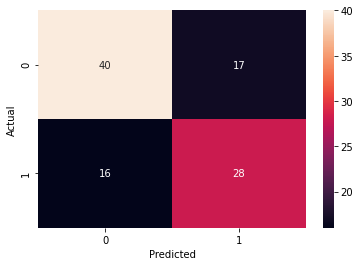

In [84]:
sns.heatmap(confusion_matrix(y_test,y_predl), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# KNN

In [86]:
modelk=KNeighborsClassifier(n_neighbors=5)

In [87]:
std=StandardScaler()

In [88]:
x_trains=std.fit_transform(x_train)

In [89]:
x_tests=std.fit_transform(x_test)

In [90]:
x_tests

array([[ 0.0346252 , -1.1133954 , -0.57410404, ..., -0.48135986,
        -0.51234754,  1.18522652],
       [ 2.47814337, -1.18995108, -0.94629846, ...,  2.07744783,
        -0.51234754, -0.84372057],
       [-0.79482592,  1.04930261,  0.48326649, ..., -0.48135986,
        -0.51234754, -0.84372057],
       ...,
       [-0.63790274, -0.86017276, -0.87862674, ..., -0.48135986,
        -0.51234754,  1.18522652],
       [-0.22317717, -0.18883832,  0.23795652, ..., -0.48135986,
        -0.51234754,  1.18522652],
       [-0.21196838, -0.35519971, -0.31187615, ...,  2.07744783,
        -0.51234754, -0.84372057]])

In [91]:
modelk.fit(x_trains,y_train)

KNeighborsClassifier()

In [92]:
y_predk=modelk.predict(x_tests)

In [93]:
accuracy_score(y_test,y_predk)

0.6039603960396039

In [95]:
Errors=[]
K=range(1,40)
for k in K:
    modelkk=KNeighborsClassifier(k)
    modelkk.fit(x_trains,y_train)
    y_predkk=modelkk.predict(x_tests)
    Errors.append(1-accuracy_score(y_test,y_predkk))

In [96]:
Errors

[0.4455445544554455,
 0.4356435643564357,
 0.4257425742574258,
 0.40594059405940597,
 0.39603960396039606,
 0.39603960396039606,
 0.4158415841584159,
 0.49504950495049505,
 0.4752475247524752,
 0.48514851485148514,
 0.4554455445544554,
 0.4158415841584159,
 0.4653465346534653,
 0.4554455445544554,
 0.4455445544554455,
 0.4356435643564357,
 0.4554455445544554,
 0.4158415841584159,
 0.4257425742574258,
 0.4455445544554455,
 0.4455445544554455,
 0.4455445544554455,
 0.4455445544554455,
 0.4752475247524752,
 0.4554455445544554,
 0.48514851485148514,
 0.4554455445544554,
 0.4653465346534653,
 0.4752475247524752,
 0.4752475247524752,
 0.48514851485148514,
 0.49504950495049505,
 0.5247524752475248,
 0.504950495049505,
 0.504950495049505,
 0.4653465346534653,
 0.504950495049505,
 0.504950495049505,
 0.49504950495049505]

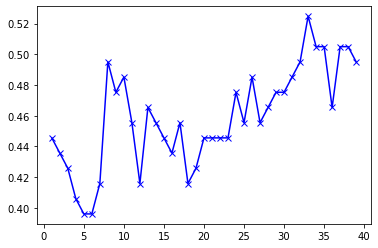

In [97]:
plt.plot(K,Errors, 'bx-')